In [1]:
import os
import cv2
import numpy as np

from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_root = "../../data/cowc/datasets/ground_truth_sets"
city_dir = "Utah_AGRC"
scene = "12TVL240120"

scene_basename = os.path.join(os.path.join(data_root, city_dir), scene)

image_path = scene_basename + ".png"
car_annotation_path = scene_basename + "_Annotated_Cars.png"
neg_annotation_path = scene_basename + "_Annotated_Negatives.png"

In [3]:
def read_image_as_array(path, use_alpha=False):
    image = Image.open(path)
    
    array = np.array(image)
    
    if use_alpha:
        array = array[:, :, 3]
    else:
        array = array[:, :, :-1]  # Remove alpha channel    
        
    return array


image = read_image_as_array(image_path)
car_array = read_image_as_array(car_annotation_path, use_alpha=True)
neg_array = read_image_as_array(neg_annotation_path, use_alpha=True)

print(image.shape)
print(car_array.shape)
print(neg_array.shape)

(13333, 13333, 3)
(13333, 13333)
(13333, 13333)


In [4]:
def extract_patch(source_image, center_xy, patch_size=400):
    cx, cy = center_xy
    
    left = cx - patch_size // 2
    top = cy - patch_size // 2
    right = left + patch_size
    bottom = top + patch_size
    
    patch = source_image[top:bottom, left:right]
    
    return patch


def extract_annotation_pos(annotation_image):
    ys, xs = np.where(annotation_image > 0)
    
    return xs, ys


def plot_annotation(source_image, xs, ys, marker_rgb, marker_radius=5):
    image_ret = source_image.copy()
    
    for (x, y) in zip(xs, ys):
        cv2.circle(image_ret, (x, y), marker_radius, marker_rgb, -1)
    
    return image_ret

In [5]:
def show_plots(patch, car_plot, neg_plot, center_xy, figsize=(5 * 3, 5)):
    
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=figsize)
    
    ax0.imshow(patch)
    ax0.set_title('Original patch')
    
    ax1.imshow(car_plot)
    ax1.set_title('Car annotation plot')
    
    ax2.imshow(neg_plot)
    ax2.set_title('Negative cls annotation plot')
    
    fig.suptitle("Patch located at (x, y) = ({}, {}) in original scene".format(center_xy[0], center_xy[1]))

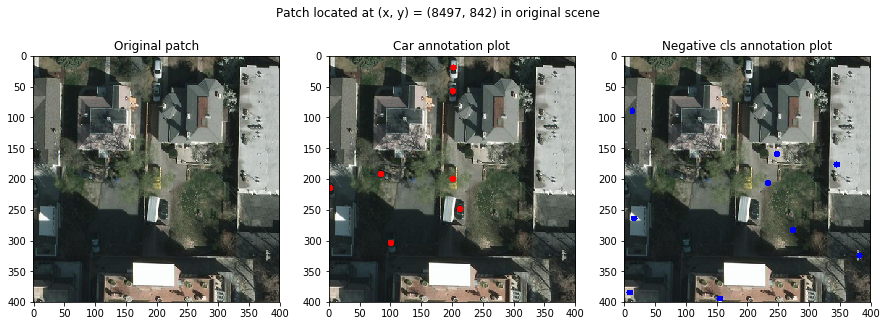

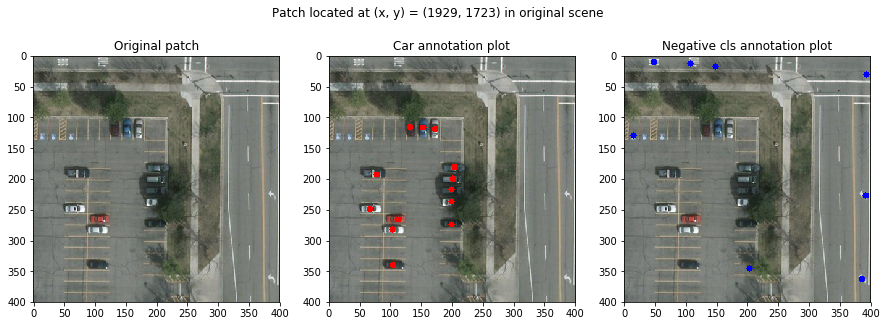

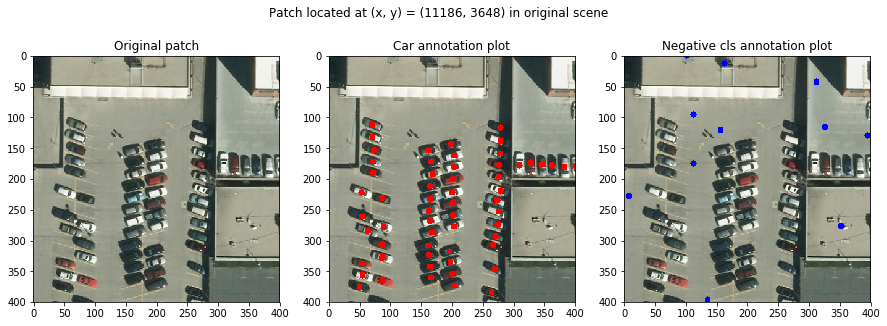

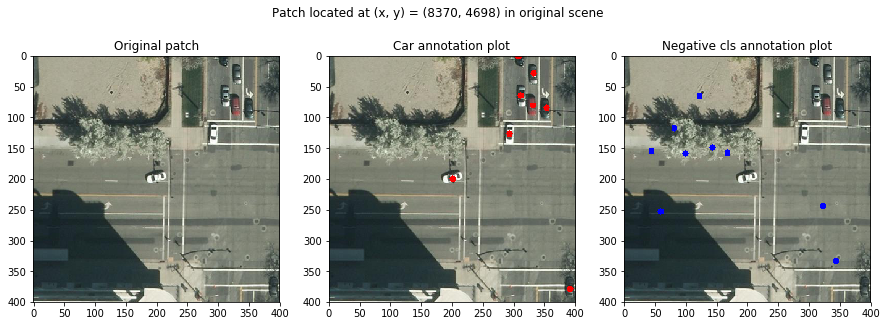

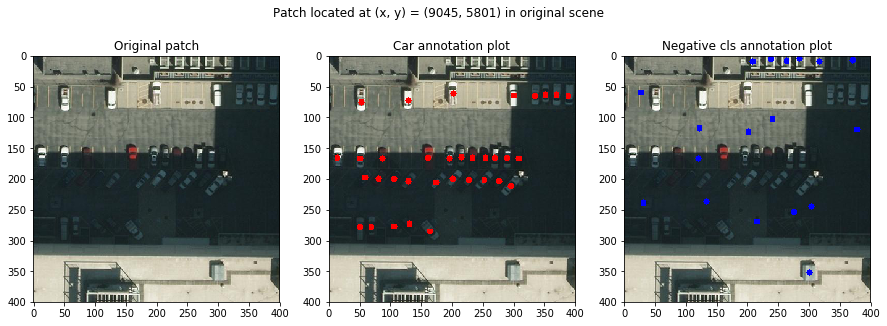

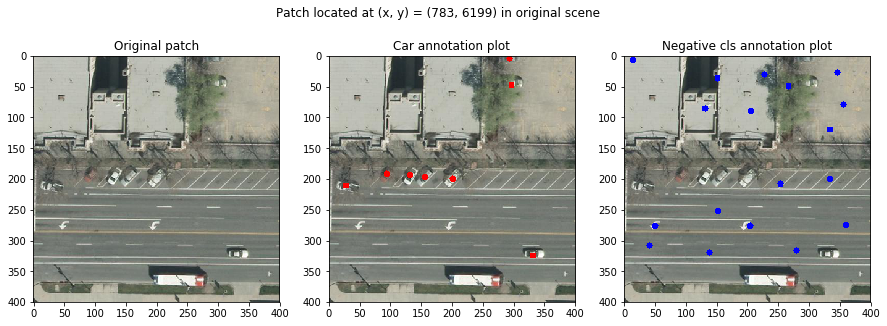

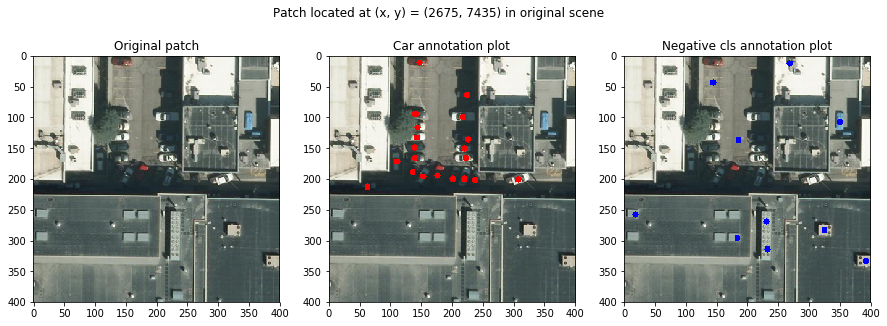

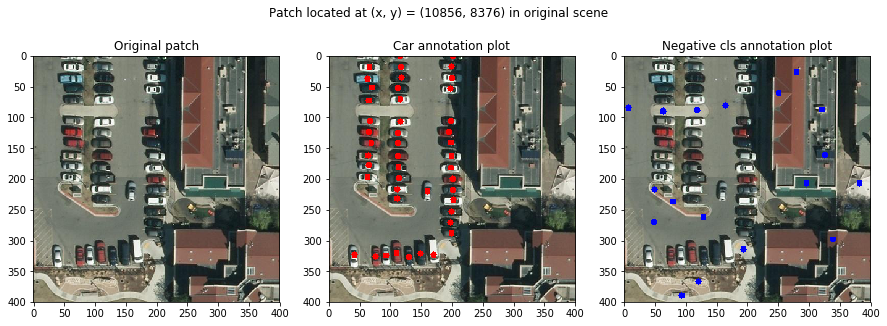

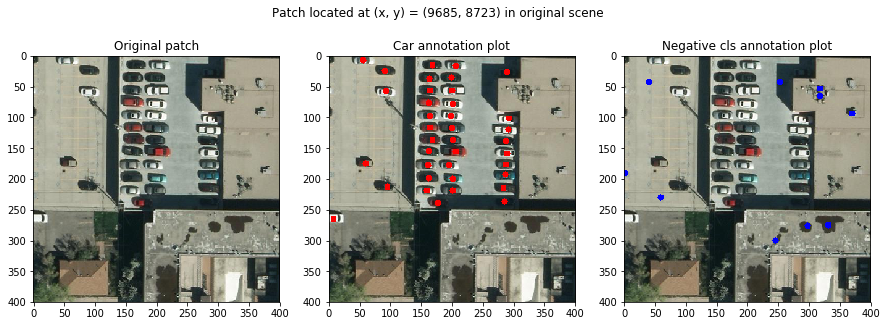

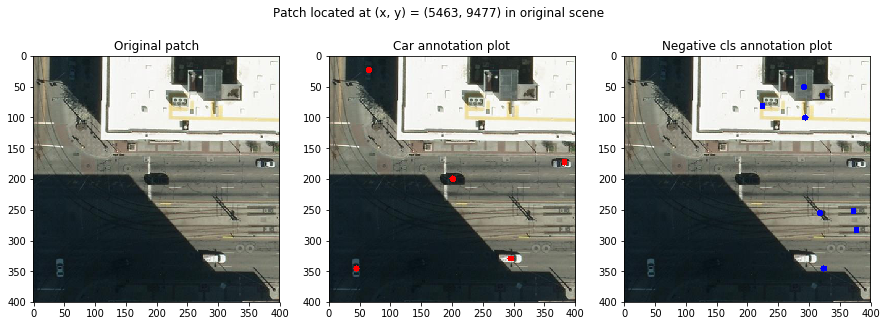

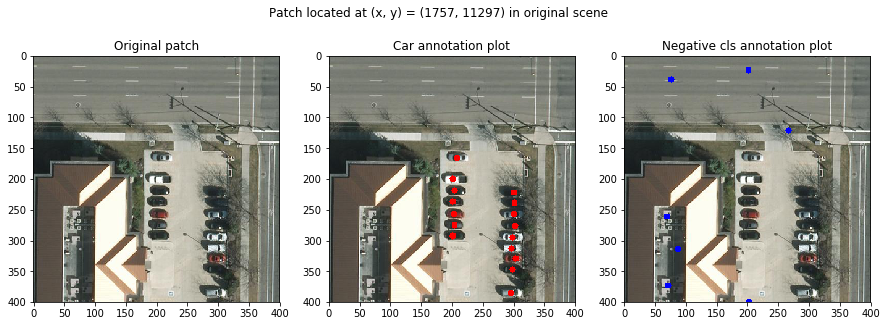

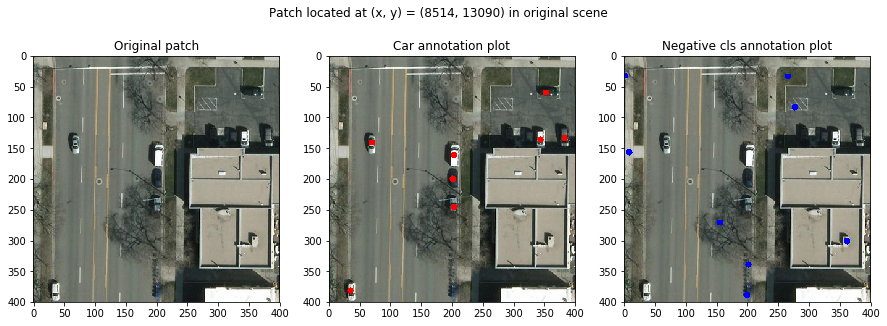

In [6]:
xs, ys = extract_annotation_pos(car_array)

for i in [500, 1100, 2500, 3300, 4500, 5100, 6600, 7800, 8400, 9300, 11000, 13000]:
    
    x, y = xs[i], ys[i]
    patch_xy = (x, y)
    
    image_patch = extract_patch(image, patch_xy)
    
    car_patch = extract_patch(car_array, patch_xy)
    car_xs, car_ys = extract_annotation_pos(car_patch)
    car_plot = plot_annotation(image_patch, car_xs, car_ys, (255, 0, 0))
    
    neg_patch = extract_patch(neg_array, patch_xy)
    neg_xs, neg_ys = extract_annotation_pos(neg_patch)
    neg_plot = plot_annotation(image_patch, neg_xs, neg_ys, (0, 0, 255))
    
    show_plots(image_patch, car_plot, neg_plot, patch_xy)
    plt.show()